In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils, losses, layers, Sequential, callbacks
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

Train NN model of DF-SP

In [2]:
path_train_df = r'SP_result_hh.csv'

In [4]:
def std_(x):
  return np.std(x)

def mean_(x):
  return np.mean(x)


def norm(x):
  return (x - np.mean(x)) / np.std(x)

In [ ]:
df = pd.read_csv(path_train_df)
bands = ['B3','B4','B5','B6','B7','B8','B8A','B11','B12','SZA','DOY','stage']
yOverall = df['lai']
xOverall = norm(df[bands])

In [ ]:
mean_st = mean_(df[bands])
std_st = std_(df[bands])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(xOverall, yOverall, test_size=0.2, random_state=42)

In [9]:
EPOCHS = 200
BATCH_SIZE = 128

model = Sequential([

    layers.Dense(
        units = 4,
        activation = 'relu',
        input_shape = [len_bands]
    ),

    layers.Dense(1)
])

In [10]:
model.compile(
    optimizer = 'adam',
    loss = 'mae',
    metrics = ['mae']
)

In [11]:
early_stop = callbacks.EarlyStopping(monitor='val_mae', min_delta=0.05, patience=3)

In [12]:
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, 
                validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

Epoch 1/200
161/161 [==============================] - 2s 3ms/step - loss: 2.4838 - mae: 2.4838 - val_loss: 2.0760 - val_mae: 2.0760
Epoch 2/200
161/161 [==============================] - 0s 2ms/step - loss: 1.7898 - mae: 1.7898 - val_loss: 1.5791 - val_mae: 1.5791
Epoch 3/200
161/161 [==============================] - 0s 2ms/step - loss: 1.3920 - mae: 1.3920 - val_loss: 1.2524 - val_mae: 1.2524
Epoch 4/200
161/161 [==============================] - 0s 2ms/step - loss: 1.1609 - mae: 1.1609 - val_loss: 1.1020 - val_mae: 1.1020
Epoch 5/200
161/161 [==============================] - 0s 2ms/step - loss: 1.0721 - mae: 1.0721 - val_loss: 1.0424 - val_mae: 1.0424
Epoch 6/200
161/161 [==============================] - 0s 2ms/step - loss: 1.0348 - mae: 1.0348 - val_loss: 1.0171 - val_mae: 1.0171
Epoch 7/200
161/161 [==============================] - 0s 2ms/step - loss: 1.0153 - mae: 1.0153 - val_loss: 1.0016 - val_mae: 1.0016
Epoch 8/200
161/161 [==============================] - 0s 2ms/step - 

r2 = 0.4979
rmse = 1.3878
max =  4.572852730751038
min =  0.09161299467086792


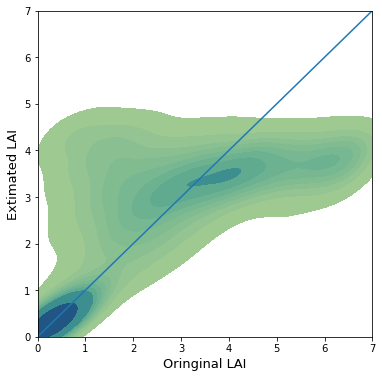

In [14]:
predict = model.predict(X_test)
predict = predict.flatten()
r2 = r2_score(y_test, predict)
rmse = (mean_squared_error(y_test, predict))**0.5
print(f'r2 = {round(r2, 4)}')
print(f'rmse = {round(rmse, 4)}')
print('max = ', pd.Series(predict.reshape(-1)).quantile(0.99))
print('min = ', pd.Series(predict.reshape(-1)).quantile(0.01))

fig, ax = plt.subplots(figsize=(6,6))
sns.kdeplot(x = y_test, y = predict , cmap='crest', fill=True, ax=ax)
ax.set_xlabel('Oringinal LAI', fontsize=13)
ax.set_ylabel('Extimated LAI', fontsize=13)
ax.set_xlim((0,7))
ax.set_ylim((0,7))
ax.plot([0,7],[0,7])
ax.set_xticks(np.arange(0, 7.01, step = 1))
ax.set_yticks(np.arange(0, 7.01, step = 1))
plt.show()